In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
follows = pd.read_csv("../data/skillshare_2022_follows.csv", index_col=0)
follows

,follower_uid,target_uid,follow_time,is_follower_deleted,is_target_deleted,is_email_enabled
0,8994,797923,2022-03-01 14:40:40,False,False,1
1,8994,3407987,2022-02-25 17:55:50,False,False,1
2,8994,10136582,2022-02-25 17:54:30,False,False,1
3,8994,13421205,2022-03-01 14:36:48,False,False,1
4,46649,5098613,2022-05-22 13:22:00,False,False,1
...,...,...,...,...,...,...
341679,26283948,3045460,2022-06-24 13:21:59,False,False,1
341680,26284046,2005611,2022-06-12 08:33:55,False,False,1
341681,26284046,2603278,2022-06-14 01:08:32,False,False,1
341682,26284089,381358,2022-06-01 02:22:46,False,False,1


In [3]:
print(f"{len(follows.follower_uid.unique())} unique users using follow system")
f"{len(follows.target_uid.unique())} unique users being followed"

140679 unique users using follow system


'15070 unique users being followed'

In [4]:
graph = nx.from_pandas_edgelist(
    follows, 
    source="follower_uid", 
    target="target_uid",
    create_using=nx.MultiDiGraph())
graph

In [5]:
starts_with_views_df = pd.read_csv('data/skillshare_2022_starts_views_combined.csv', index_col=0)
starts_with_views_df = starts_with_views_df[starts_with_views_df.user_uid.notnull()]
starts_with_views_df.user_uid = starts_with_views_df.user_uid.astype(int)
starts_with_views_df.set_index("user_uid", inplace=True)

day_columns = [ f"day-{i}" for i in range(1, 32) ]
starts_with_views_df["total_watch_time"] = starts_with_views_df[day_columns].sum(axis=1)
starts_with_views_df.head()

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
starts_with_views_df["out_degree_centrality"] = pd.Series(nx.out_degree_centrality(graph))
starts_with_views_df["out_degree_centrality"] = starts_with_views_df["out_degree_centrality"].fillna(0.0)
starts_with_views_df.head()

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time,out_degree_centrality
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,0.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0,0.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
starts_with_views_df["in_degree_centrality"] = pd.Series(nx.in_degree_centrality(graph))
starts_with_views_df["in_degree_centrality"] = starts_with_views_df["in_degree_centrality"].fillna(0.0)
starts_with_views_df

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time,out_degree_centrality,in_degree_centrality
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,0.0,0.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0,0.0,0.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284161,2022-05-31 23:56:47,0,False,2,2,0,0,35,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0
26259150,2022-05-31 23:56:53,0,False,2,2,0,17,227,0.0,1508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1508.0,0.0,0.0
26284159,2022-05-31 23:57:46,0,True,1,5,0,17,227,0.0,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,0.0,0.0


In [8]:
hubs, _authorities = nx.hits(graph)
starts_with_views_df["hub"] = pd.Series(hubs)
starts_with_views_df["hub"] = starts_with_views_df["hub"].fillna(0.0)
starts_with_views_df

/usr/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time,out_degree_centrality,in_degree_centrality,hub
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,347.0,0.0,0.0,0.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2106.0,0.0,0.0,0.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284161,2022-05-31 23:56:47,0,False,2,2,0,0,35,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0
26259150,2022-05-31 23:56:53,0,False,2,2,0,17,227,0.0,1508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1508.0,0.0,0.0,0.0
26284159,2022-05-31 23:57:46,0,True,1,5,0,17,227,0.0,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,217.0,0.0,0.0,0.0


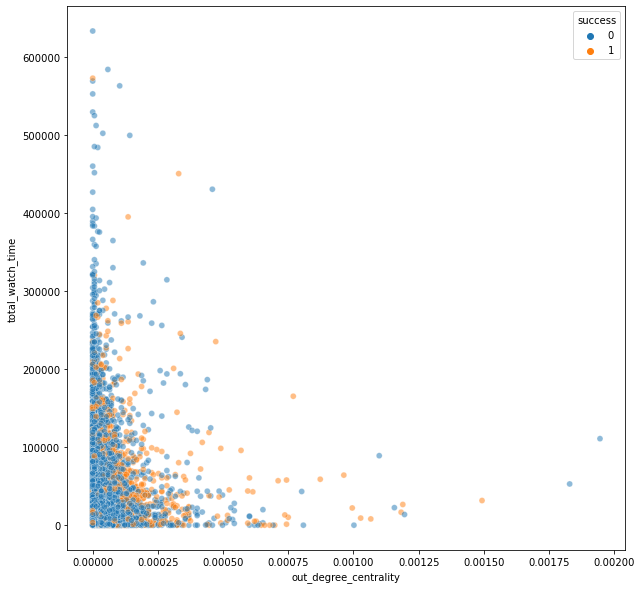

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=starts_with_views_df,
    x="out_degree_centrality",
    y="total_watch_time",
    alpha=0.5,
    hue="success")
plt.show()

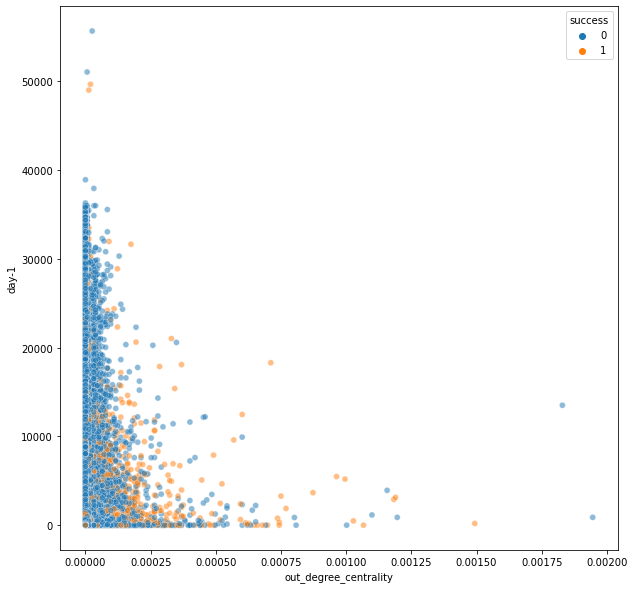

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=starts_with_views_df,
    x="out_degree_centrality",
    y="day-1",
    alpha=0.5,
    hue="success")
plt.show()

In [11]:
X = starts_with_views_df.drop(columns=["create_time", "success", "is_cancelled"])
y = starts_with_views_df.success

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# Try RFC to see what feature importances it finds
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
rfclf.score(X_test, y_test)

0.7360804967104709

In [16]:
feature_importances = pd.Series(
    rfclf.feature_importances_,
    index=X.columns)\
    .sort_values(ascending=True)

feature_importances.sort_values(ascending=False)[:10]

total_watch_time             0.207679
day-1                        0.187590
day-2                        0.072177
day-3                        0.043548
day-4                        0.034156
hub                          0.031873
payment_ux_cat_codes         0.031049
day-5                        0.029380
sub_utm_channel_cat_codes    0.028041
day-6                        0.026138
dtype: float64